> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [3]:
movies_raw = pd.read_csv('tmdb-movies.csv')

#### Cooments:

>sdfkldjsfj;sd

<a id='wrangling'></a>
## Data Wrangling

### General Properties

We will now explore the range of values of this dataset.  We can get a quick idea using the <b>info</b> and <b>describe</b> methods. 

In [4]:
# this will give us gross statistics on the numerically based columns.
movies_raw.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# this will give us information about how many records there are, what columns exist, and which are filled with nulls.
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
movies_raw.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning

From the <b>info</b> method above, we can immediately get rid of any columns not relevant to the study or repetative.  In particular:

>homepage
>
>tagline
>
>keywords
>
>overview
>id & imbdb_id
>
>release_year (captured in <i>release_date</i>)
>
>budget and revenue (use the 2010 adjusted values, so drop these).

In [7]:
movies_raw.drop(labels=['homepage','tagline','keywords','overview','id','imdb_id','release_year','budget','revenue'],axis=1,inplace=True)

After dropping the above columns, let's convet the release date to an actual date, rather than a string.  We can us the <b>to_datetime</b> method to do this:

In [8]:
movies_raw['release_date'] = pd.to_datetime(movies_raw['release_date'])
movies_raw.release_date.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

From the <b>head</b> method we performed earlier, we could see that <i><b>cast</b></i>, <i><b>production companies</b></i>, and <i><b>genres</b></i> will need to be split apart, as multiple entires were put on a single entry.  The delimiter was a <b>|</b>.

Since they're stringe we will split them and use a lambda function to put each additional entry beyond the first into another seperated column.

In [9]:
cast = movies_raw['cast'].str.split('|',expand=True).rename(columns=lambda x: f"cast_{x+1}")
genres = movies_raw['genres'].str.split('|',expand=True).rename(columns=lambda x: f"genres_{x+1}")
prod_comp = movies_raw['production_companies'].str.split('|',expand=True).rename(columns=lambda x: f"prod_comp_{x+1}")

We can now join the seperated columns back into the main dataframe, and drop the original multivalued column.

In [10]:
movies_raw = movies_raw.join([cast])
movies_raw.drop(labels=['cast'],axis=1,inplace=True)
movies_raw.head(1)

,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson


and again...

In [11]:
movies_raw = movies_raw.join([genres])
movies_raw.drop(labels=['genres'],axis=1,inplace=True)
movies_raw.head(1)

,popularity,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5,genres_1,genres_2,genres_3,genres_4,genres_5
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None


and finally...

In [12]:
movies_raw = movies_raw.join([prod_comp])
movies_raw.drop(labels=['production_companies'],axis=1,inplace=True)
movies_raw.head(1)

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,cast_1,...,genres_1,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,Chris Pratt,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu


In [13]:
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 24 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
cast_1            10790 non-null object
cast_2            10646 non-null object
cast_3            10556 non-null object
cast_4            10447 non-null object
cast_5            10134 non-null object
genres_1          10843 non-null object
genres_2          8515 non-null object
genres_3          5079 non-null object
genres_4          1981 non-null object
genres_5          542 non-null object
prod_comp_1       9836 non-null object
prod_comp_2       6396 non-null object
prod_comp_3       3816 non-null object
prod_comp

We will now check for any duplicated films in the list...

In [14]:
movies_raw[movies_raw.duplicated() == True]

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,cast_1,...,genres_1,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5
2090,0.59643,TEKKEN,Dwight H. Little,92,2010-03-20,110,5.0,30000000.0,967000.0,Jon Foo,...,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None,None


We verify the one film that came back as duplicated...

In [15]:
movies_raw[movies_raw['original_title'] == 'TEKKEN']

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,cast_1,...,genres_1,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5
2089,0.59643,TEKKEN,Dwight H. Little,92,2010-03-20,110,5.0,30000000.0,967000.0,Jon Foo,...,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None,None
2090,0.59643,TEKKEN,Dwight H. Little,92,2010-03-20,110,5.0,30000000.0,967000.0,Jon Foo,...,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None,None


We will drop the duplicated film and verify that there is a single record now...

In [16]:
movies_raw.drop_duplicates(inplace=True)
movies_raw[movies_raw['original_title'] == 'TEKKEN']

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,cast_1,...,genres_1,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5
2089,0.59643,TEKKEN,Dwight H. Little,92,2010-03-20,110,5.0,30000000.0,967000.0,Jon Foo,...,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None,None


From investigating, there are many movies in the list with either <b>zero</b> revenue or budget.  We would like to eliminate these values from the study as their lack of information about cost/revenue would not give a reliable analysis of the profitability of the movie.

To do this we will simply applie a logical mask.  We will require that a movie have non-zero adjusted budget <u><b>AND</b></u> non-zero adjusted revenue.  

These values willl be put in a new dataframe called <i>movies_clean</i>. We will insert in a new dataframe so as to not make it a slice of the previous <b>movies_raw</b> dataframe.

In [77]:
movies_clean = pd.DataFrame(movies_raw[(movies_raw.budget_adj!=0) & (movies_raw.revenue_adj!=0)])

In [78]:
movies_clean.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,9.693980e-01,2.370705e+00
25%,0.462368,95.000000,71.000000,5.700000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09


In [73]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [74]:
movies_clean['gross_adj'] = movies_clean.revenue_adj-movies_clean.budget_adj

In [75]:
movies_clean.gross_adj.describe()

count    3.854000e+03
mean     9.282470e+07
std      1.940715e+08
min     -4.139124e+08
25%     -1.504995e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
Name: gross_adj, dtype: float64

In [76]:
def max_min(df,col):
    '''
    calculate the max and min values of a given column.
    
    input: dataframe of interest, column of interest
    output: concatinated maximum and minumum rows for the dataframe[column]
    '''
    mi = df[df[col] == df[col].min()]
    mx = df[df[col] == df[col].max()]
    
    return pd.concat([mx,mi])

In [69]:
max_min(movies_clean,'gross_adj')

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,cast_1,...,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5,gross_adj
1329,12.037933,Star Wars,George Lucas,121,1977-03-20,4428,7.9,3.957559e+07,2.789712e+09,Mark Hamill,...,Action,Science Fiction,None,None,Lucasfilm,Twentieth Century Fox Film Corporation,None,None,None,2.750137e+09
2244,0.250540,The Warrior's Way,Sngmoo Lee,100,2010-12-02,74,6.4,4.250000e+08,1.108757e+07,Kate Bosworth,...,Fantasy,Action,Western,Thriller,Boram Entertainment Inc.,None,None,None,None,-4.139124e+08


Let us create a column <b>rev_over_bud</b> that will express how much revenue was a fraction of budget.  Clearly, a fraction less than one means it failed to earn more than it's budget.

We are only using adjusted 2010 dollar fields so costs is normalized to a common dollar amount.

In [79]:
movies_clean['rev_over_bud'] = movies_clean.revenue_adj/movies_clean.budget_adj

We can see the distribution characteristics of movies revenue vs their budget.  We know that a quarter of the films failed to recover the amount of money needed to cover the costs.

In [86]:
movies_clean.describe()['rev_over_bud']

count    3.854000e+03
mean     2.980412e+02
std      1.644256e+04
min      2.400000e-07
25%      8.765882e-01
50%      2.119690e+00
75%      4.210444e+00
max      1.018619e+06
Name: rev_over_bud, dtype: float64

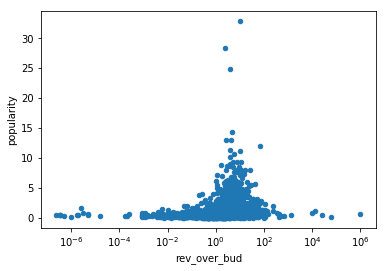

In [94]:
movies_clean.plot.scatter(x='rev_over_bud',y='popularity',logx=True)

In [96]:
max_min(movies_clean,'rev_over_bud')

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,cast_1,...,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5,rev_over_bud
10495,0.772494,"The Karate Kid, Part II",John G. Avildsen,113,1986-06-18,211,5.8,2.248029e+02,2.289886e+08,Ralph Macchio,...,Drama,Action,Romance,Family,Columbia Pictures Corporation,Delphi V Productions,None,None,None,1.018619e+06
10307,0.450208,The House of the Spirits,Bille August,140,1993-10-19,52,6.7,3.773675e+07,9.056820e+00,Meryl Streep,...,Drama,None,None,None,Det Danske Filminstitut,Spring Creek Productions,Eurimages,Costa do Castelo Filmes,Neue Constantin Film,2.400000e-07


In [97]:
max_min(movies_clean,'popularity')

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,cast_1,...,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5,rev_over_bud
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,Chris Pratt,...,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,10.090192
7268,0.001117,Born into Brothels,Zana Briski|Ross Kauffman,85,2004-12-08,23,6.4,4.040559e+05,4.057946e+06,Zana Briski,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,10.043031


In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!